## K Nearest Neighbours

In [24]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,f1_score
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

### Data Preparation

In [2]:
# Load data
df = pd.read_csv('../data/Synthetic_Financial_datasets_log.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df.shape

(6362620, 11)

In [5]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### Feature Engineerings

In [6]:
# Will keep column type for this analysis.
df.drop(columns=['nameOrig','nameDest'],axis=1,inplace=True)

In [7]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,False,False,True,False
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,False,False,True,False
2,1,181.00,181.0,0.00,0.0,0.0,1,0,False,False,False,True
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,True,False,False,False
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,False,False,True,False


In [8]:
# get correlation
df.corr(numeric_only=True)['isFraud'].sort_values(ascending=False)

isFraud           1.000000
amount            0.076688
type_TRANSFER     0.053869
isFlaggedFraud    0.044109
step              0.031578
type_CASH_OUT     0.011256
oldbalanceOrg     0.010154
newbalanceDest    0.000535
type_DEBIT       -0.002911
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
type_PAYMENT     -0.025697
Name: isFraud, dtype: float64

In [9]:
loans_df= df.drop('isFlaggedFraud',axis=1)

X = loans_df.drop('isFraud',axis=1)
y= loans_df['isFraud']

In [10]:
loans_df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

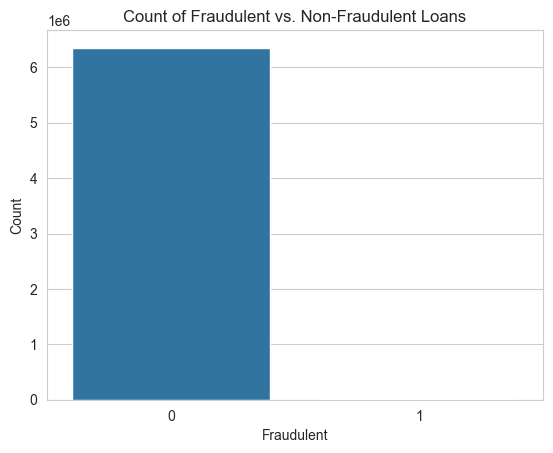

In [11]:
sns.countplot(x='isFraud', data=loans_df)
# Customize the plot
plt.xlabel('Fraudulent')
plt.ylabel('Count')
plt.title('Count of Fraudulent vs. Non-Fraudulent Loans')
plt.show()

Our data is clearly imbalanced, We have to find a way to make it balanced for analysis

### Perform Oversampling technique

In [12]:
# Before oversampling
loans_df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [13]:
smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X,y)

# Join the values
oversampled_loans = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['isFraud'])], axis=1)



In [14]:
# Recheck after oversampling
oversampled_loans['isFraud'].value_counts()

isFraud
0    6354407
1    6354407
Name: count, dtype: int64

### Perform Train test split

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

In [16]:
# Fitting and evaluating the model
knn = KNeighborsClassifier(n_neighbors=3)
#knn.fit(X_train,y_train)
#y_pred = knn.predict(X_test)

In [17]:
# Evaluate the model
#train_accuracy = knn.score(X_train, y_train)
#test_accuracy = knn.score(X_test, y_test)

#print("Training Accuracy:", train_accuracy)
#print("Test Accuracy:", test_accuracy)

I will continue with down sampling technique

In [18]:
majority_class = loans_df[loans_df['isFraud'] == 0]
minority_class = loans_df[loans_df['isFraud'] == 1]

# Downsample the majority class to match the minority class
majority_downsampled = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=42)

downsampled_loans= pd.concat([majority_downsampled,minority_class])


In [19]:
# check the shape
print(f'Downsampled Loans: {downsampled_loans.shape}')
print(f'Downsampled Loans Count: {downsampled_loans['isFraud'].value_counts()}')

Downsampled Loans: (16426, 11)
Downsampled Loans Count: isFraud
0    8213
1    8213
Name: count, dtype: int64


In [20]:
# Split, train and predict
X= downsampled_loans.drop('isFraud',axis=1)
y = downsampled_loans['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [21]:
train_accuracy = knn.score(X_train, y_train)
test_accuracy = knn.score(X_test, y_test)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.9773211567732115
Test Accuracy: 0.963481436396835


In [22]:

f1 = f1_score(y_test,y_pred)
cls_report = classification_report(y_test,y_pred)
print(f'F1 Score: {f1}')

print(f'Classification Report: {cls_report}')

F1 Score: 0.9635701275045537
Classification Report:               precision    recall  f1-score   support

           0       0.97      0.96      0.96      1649
           1       0.96      0.97      0.96      1637

    accuracy                           0.96      3286
   macro avg       0.96      0.96      0.96      3286
weighted avg       0.96      0.96      0.96      3286



## Hyperparameters Tuning

In [25]:
parameters= {
    'n_neighbors':range(1,11),
    'weights':['uniform','distance'],
    'metric':['minkowski','manhattan','euclidean']
}
grid = GridSearchCV(estimator=knn,param_grid=parameters,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)

print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'metric': 'minkowski', 'n_neighbors': 4, 'weights': 'distance'}
0.9582191780821917
KNeighborsClassifier(n_neighbors=4, weights='distance')


dataset Link: https://www.kaggle.com/datasets/sriharshaeedala/financial-fraud-detection-dataset